<a href="https://colab.research.google.com/github/JJungEEun/public_transportation_data/blob/main/%EC%A7%80%EC%97%AD%EB%B3%84_%EC%9B%94%EB%B3%84_%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0_%EA%B1%B4%EC%88%98_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#메인 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline 

main_data = pd.read_csv('/content/drive/MyDrive/꿔8로우/data/정수형변환데이터(서울).csv', sep=',', encoding='utf-8')

In [4]:
main_data.head()

,Unnamed: 0,발생일,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,발생일_시간,발생일_시간_시군구,사고건수,발생년도,발생월,발생일자
0,0,2010-01-01,0,0,12,0,204,0,0,1,0,1,1,1,3,1,4,2,3,7,6,1,54,4,12,1,19,0,20100101 00시,20100101 00시 마포구,1,2010,1,1
1,1,2010-01-01,0,0,11,3,85,0,1,3,0,1,11,12,6,1,2,2,3,7,7,1,57,4,7,1,39,6,20100101 00시,20100101 00시 동작구,1,2010,1,1
2,2,2010-01-01,0,0,4,0,242,0,0,2,0,1,11,12,3,1,2,5,3,7,6,1,51,0,7,1,58,0,20100101 00시,20100101 00시 관악구,1,2010,1,1
3,3,2010-01-01,0,0,3,0,453,0,0,1,0,1,1,1,6,1,0,2,0,3,6,1,56,4,7,1,55,0,20100101 00시,20100101 00시 강서구,1,2010,1,1
4,4,2010-01-01,0,0,6,0,32,0,0,2,0,1,8,9,5,1,0,2,0,2,6,1,33,4,7,1,55,0,20100101 00시,20100101 00시 구로구,1,2010,1,1


In [6]:
sj_data = pd.read_csv('/content/drive/MyDrive/꿔8로우/예측용데이터/2017년 세종시 교통사고 건수 시간별 데이터.csv', sep=',', encoding='utf-8')

In [159]:
sj_data['법정동명'].unique()

array([16, 22, 20,  6,  2, 21, 13,  9,  3, 14, 18, 17, 19,  1,  8, 15, 10,
       11, 23, 32,  5, 26,  7, 44, 12, 42, 35,  4, 25, 31, 29, 37, 27,  0,
       55, 34, 28, 36])

##모델 학습

회귀 모델 중 랜덤포레스트 / 선형 회귀 / 선형_로그 회귀 모델 사용 --> 편의를 위해 함수로 정의

In [53]:
  from sklearn.model_selection import KFold
  from sklearn.model_selection import cross_val_score
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import r2_score
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.linear_model import LinearRegression
  import matplotlib.pyplot as plt
  import numpy as np

  def data_split(data, feature_names):

    X_train = data[(data['발생년도']<2018)][feature_names]
    X_test = data[(data['발생년도']==2018)][feature_names]
    y_train = data[(data['발생년도']<2018)]['사고건수']
    y_test = data[(data['발생년도']==2018)]['사고건수']
    y_test= y_test.reset_index(drop=True)

    return X_train, X_test, y_train, y_test

  def data_split1(data1, data2, feature_names):

    X_train = data1[feature_names]
    X_test = data2[feature_names]
    y_train = data1['사고건수']
    y_test = data2['사고건수']
    y_test= y_test.reset_index(drop=True)

    return X_train, X_test, y_train, y_test

  


  def forest_fit():

    forest = RandomForestRegressor(n_estimators=100, 
                                criterion='mse', 
                                random_state=1, 
                                n_jobs=-1)
    forest.fit(X_train, y_train)
    y_train_pred = forest.predict(X_train)
    y_test_pred = forest.predict(X_test)

    print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
      mean_squared_error(y_train, y_train_pred),
      mean_squared_error(y_test, y_test_pred)))
    print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
          r2_score(y_train, y_train_pred),
          r2_score(y_test, y_test_pred)))

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(30, 10))
    plt.plot(y_test[:300], label = 'real')
    plt.plot(y_test_pred[:300], label = 'pred')
    plt.legend(fontsize = 20)
    plt.show()

    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

    scores = cross_val_score(estimator=forest,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
    print('CV 정확도 점수: %s' % scores)
    print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
    return y_test_pred


  def LR_fit():

    LR = LinearRegression()

    LR.fit(X_train, y_train)
    y_train_pred = LR.predict(X_train)
    y_test_pred = LR.predict(X_test)

    print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
      mean_squared_error(y_train, y_train_pred),
      mean_squared_error(y_test, y_test_pred)))
    print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
          r2_score(y_train, y_train_pred),
          r2_score(y_test, y_test_pred)))

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(30, 10))
    plt.plot(y_test[:300], label = 'real')
    plt.plot(y_test_pred[:300], label = 'pred')
    plt.legend(fontsize = 20)
    plt.show()

    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

    scores = cross_val_score(estimator=LR,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
    print('CV 정확도 점수: %s' % scores)
    print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))    

  
  def LR_log_fit():
    LR = LinearRegression()

    y_train_log = np.log1p(y_train)
    y_test_log = np.log1p(y_test)
    LR.fit(X_train, y_train_log)
    y_train_pred = LR.predict(X_train)
    y_test_pred = LR.predict(X_test)
    

    print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
      mean_squared_error(np.exp(y_train_log),np.exp(y_train_pred)),
      mean_squared_error(np.exp(y_test_log),np.exp(y_test_pred))))
    print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
          r2_score(np.exp(y_train_log),np.exp(y_train_pred)),
          r2_score(np.exp(y_test_log),np.exp(y_test_pred))))

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(30, 10))
    plt.plot(y_test[:300], label = 'real')
    plt.plot(np.exp(y_test_pred)[:300], label = 'pred')
    plt.legend(fontsize = 20)
    plt.show()

    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
    
    scores = cross_val_score(estimator=LR,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
    print('CV 정확도 점수: %s' % scores)
    print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


In [51]:
feature_names = ['발생시간','요일', '발생월', '발생일자', '노면상태_대분류', '노면상태', '기상상태', '도로형태', '도로형태_대분류']

In [55]:
col = ['사고내용','발생일자','요일','발생시간', '사망자수', '중상자수', '경상자수','부상신고자수', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반', '노면상태_대분류', '노면상태','기상상태',
       '도로형태_대분류', '도로형태', '가해자차종', '가해성별', '가해자연령', '가해자신체상해정도', '피해자차종', '피해자성별', '피해자연령', '피해자신체상해정도',  '사고건수']

지역별_데이터

In [44]:
loc_data = main_data.groupby(['법정동명', '발생지_시군구']).sum()[col]
loc_data = loc_data.reset_index(drop=False)

In [45]:
sj_loc_data = sj_data.groupby(['법정동명', '발생지_시군구']).sum()[col] 
sj_loc_data = sj_loc_data.reset_index(drop=False)

훈련 MSE: 326.398, 테스트 MSE: 3.671
훈련 R^2: 1.000, 테스트 R^2: 0.993


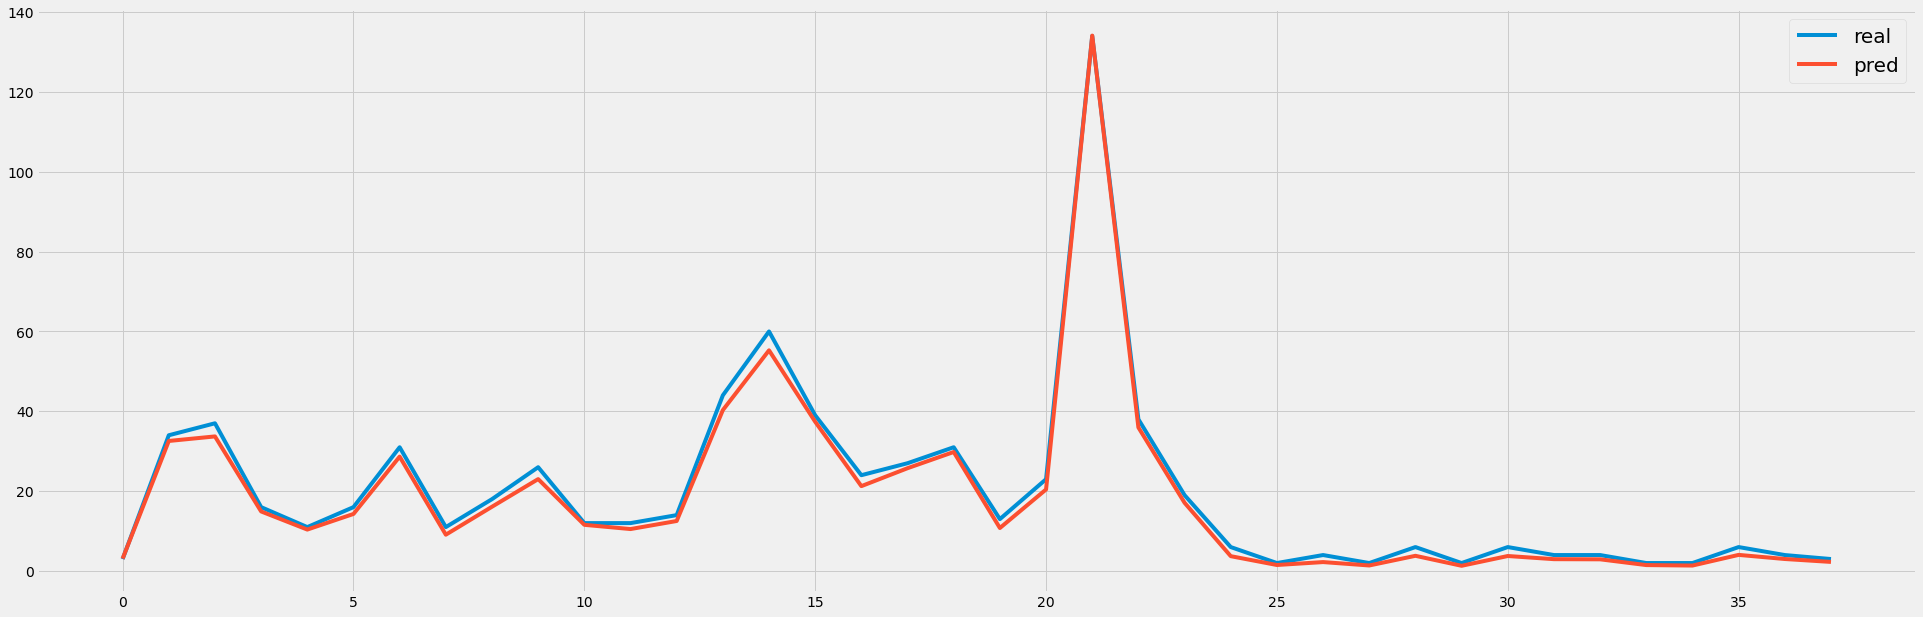

CV 정확도 점수: [0.9993356  0.9999449  0.99976641 0.9981373  0.99952801 0.97443614
 0.99988095 0.99977955 0.99974911 0.99865181]
CV 정확도: 0.997 +/- 0.008


In [52]:
X_train, X_test, y_train, y_test = data_split1(loc_data, sj_loc_data,  feature_names)
forest_fit()

지역별_월별_데이터

In [57]:
loc_mon_data = main_data.groupby(['법정동명', '발생지_시군구','발생월']).sum()[col]
loc_mon_data = loc_mon_data.reset_index(drop=False)

In [82]:
sj_mon_data = sj_data.groupby(['법정동명', '발생지_시군구','발생월']).sum()[col]
sj_index = sj_mon_data.index
sj_mon_data = sj_mon_data.reset_index(drop=False)

훈련 MSE: 0.087, 테스트 MSE: 0.004
훈련 R^2: 1.000, 테스트 R^2: 0.999


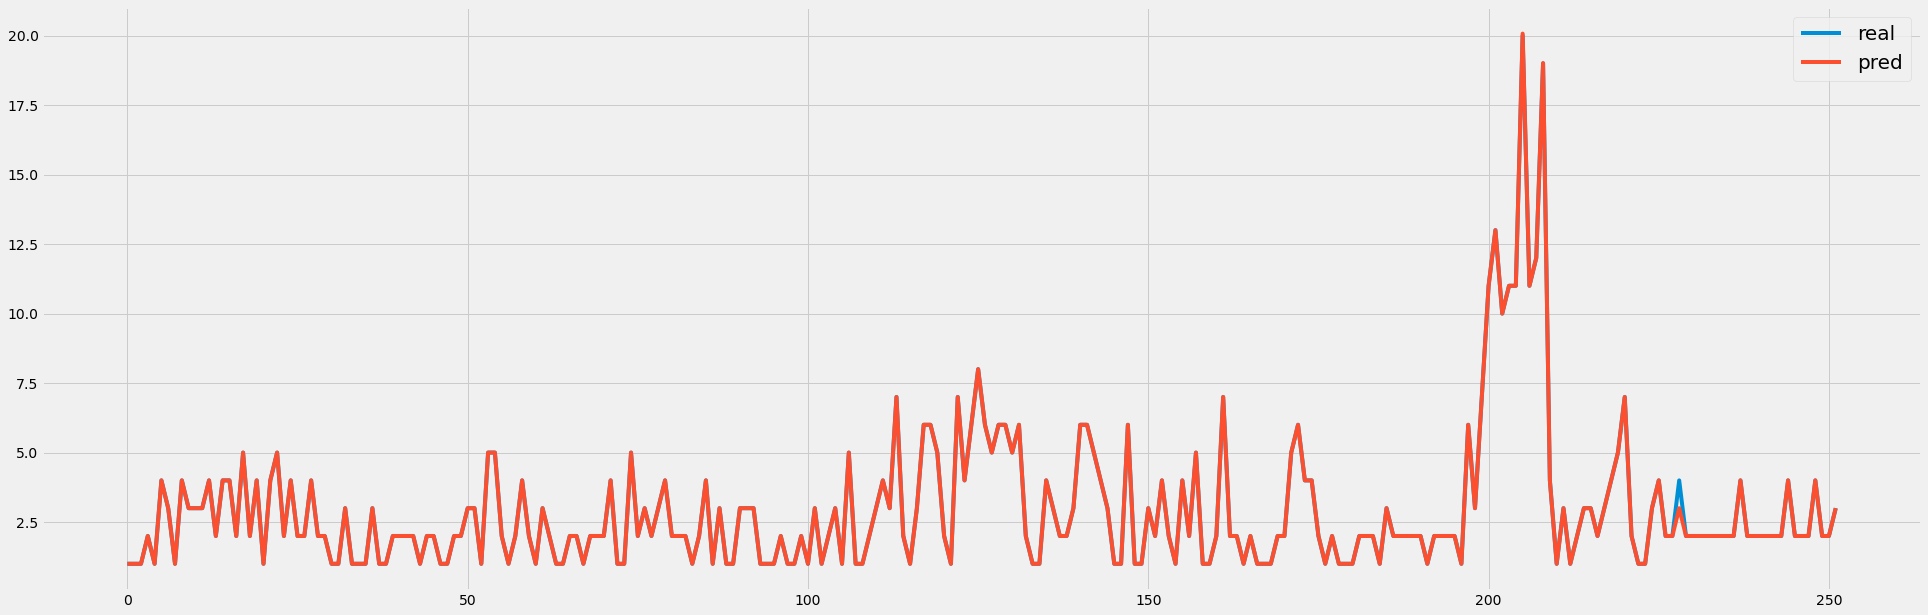

CV 정확도 점수: [0.99998273 0.99996629 0.99992531 0.99991869 0.99996527 0.98838817
 0.99996832 0.99997868 0.99998179 0.99997417]
CV 정확도: 0.999 +/- 0.003


In [131]:
X_train, X_test, y_train, y_test = data_split1(loc_mon_data, sj_mon_data,  feature_names)
ans = forest_fit()

In [132]:
result = pd.DataFrame(ans, index=sj_index, columns=['사고건수'])
result = result.reset_index(drop=False)

In [133]:
result

,법정동명,발생지_시군구,발생월,사고건수
0,0,0,3,1.0
1,0,0,11,1.0
2,0,0,12,1.0
3,1,0,1,2.0
4,1,0,2,1.0
...,...,...,...,...
247,42,0,4,2.0
248,42,0,9,4.0
249,44,0,2,2.0
250,44,0,11,2.0


In [154]:
label = {'가람동': 0, '고운동': 1, '금남면': 2, '나성동': 3, '다정동': 4, '대평동': 5, '도담동': 6, '반곡동': 7, '보람동': 8, '부강면': 9, '새롬동': 10, '소담동': 11, '소정면': 12, '아름동': 13, '어진동': 14, '연기면': 15, '연동면': 16, '연서면': 17, '장군면': 18, '전동면': 19, '전의면': 20, '조치원읍': 21, '종촌동': 22, '한솔동': 23}

for i in range(0,251):
  for key, val in label.items():
    if (result['법정동명'][i] == val):
      result['법정동명'][i] = key

In [155]:
result

,법정동명,발생지_시군구,발생월,사고건수
0,가람동,0,3,1.0
1,가람동,0,11,1.0
2,가람동,0,12,1.0
3,고운동,0,1,2.0
4,고운동,0,2,1.0
...,...,...,...,...
247,42,0,4,2.0
248,42,0,9,4.0
249,44,0,2,2.0
250,44,0,11,2.0
